In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#loading train data into dataframe df
df=pd.read_csv("train.csv")
df.drop_duplicates(inplace=True)  #removing the duplicate rows/data
print(df.shape)
df.head()

C:\Users\chira\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(56191, 18)


,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence,song_hotttnesss
0,SONG_510448,ARTIST_2029,Pressure (Explicit LP Version),2001,22050,202.39628,0.200,0,0.873,-3.609,1,1.0,193.544,111.195,a6220f6edb54938cd4f1a44f7ff48459,4,1.00,0.681186
1,SONG_68913,ARTIST_1323,Tear Out My Eyes (Album Version),2002,22050,103.78404,2.328,2,1,-3.949,1,1.0,95.306,185.117,94aabc3aee57cb4b7878e5c4458c5623,1,0.00,0.734794
2,SONG_158502,ARTIST_5289,Wherever I May Roam,1991,22050,421.53751,5.306,3,0.909,-4.016,1,1.0,415.945,136.193,7d06ef7368b3b2133cee7b01d2a0fd8b,4,0.00,0.586969
3,SONG_60605,ARTIST_10938,Everything Goes Around,2003,22050,186.06975,0.270,0,0.576,-4.741,0,1.0,179.026,165.804,de533ef1cdf1199ca5acce91c87a30cd,4,0.00,0.605378
4,SONG_71870,ARTIST_5135,Phatty Boom Batty (Album Version),1999,22050,212.45342,0.000,0,0.955,-4.926,1,1.0,204.922,143.209,62f2b97fa06c71078cbe3b15a6f36ad2,4,0.09,0.212045


In [3]:
#loading artist features into dataframe df_artist
df_artist=pd.read_csv("artists.csv")
print(df_artist.shape)
df_artist.head()

(36088, 5)


,artist_id,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude
0,ARTIST_9284,0.027504,0.000000,0.00000,0.00000
1,ARTIST_3814,0.547228,0.364787,0.00000,0.00000
2,ARTIST_2578,0.606387,0.399023,34.05349,-118.24532
3,ARTIST_11567,0.592884,0.395386,51.48126,-3.18067
4,ARTIST_3684,0.557187,0.392394,39.49974,-111.54732


In [4]:
#merging artist features to corresponding training data on the basis of common column artist_id
df_merge= pd.merge(df, df_artist, on='artist_id')
print(df_merge.shape)
df_merge.head()

(56191, 22)


,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,loudness,...,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence,song_hotttnesss,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude
0,SONG_510448,ARTIST_2029,Pressure (Explicit LP Version),2001,22050,202.39628,0.200,0,0.873,-3.609,...,193.544,111.195,a6220f6edb54938cd4f1a44f7ff48459,4,1.000,0.681186,0.863397,0.551769,42.10125,-72.58929
1,SONG_60118,ARTIST_2029,Sober (Live at Hiro Ballroom) (Explicit Version),1,22050,378.90567,0.235,1,0.926,-8.563,...,367.763,126.644,4211acc477885f6ee15a02a491d538c4,4,0.848,0.513517,0.863397,0.551769,42.10125,-72.58929
2,SONG_525679,ARTIST_2029,Pardon Me (Album Version),2008,22050,302.75873,0.148,3,0.654,-5.844,...,287.660,115.525,a8296a53c26537169e8b743d7179ec54,3,1.000,0.729826,0.863397,0.551769,42.10125,-72.58929
3,SONG_518250,ARTIST_2029,Change (Explicit LP Version),2001,22050,214.93506,0.000,11,0.935,-5.438,...,210.013,122.162,20e70022d53106b3a8e98a2cc05ae510,4,0.959,0.676970,0.863397,0.551769,42.10125,-72.58929
4,SONG_293186,ARTIST_2029,Take This (Album Version),2005,22050,282.46159,8.777,1,0.912,-6.900,...,267.111,115.048,176180470c922a9625c9e92770f35167,3,1.000,0.661648,0.863397,0.551769,42.10125,-72.58929


Discrepancies in data can be found using description table below.
For example- "duration" and "key_confidence" have count (56134) less than total no. of rows (56191) which means they have missing values (NaN value). Also, both should be float data type but they are in categorical part which mean they have incorrect datatype and we can see duration column have 'y' value for some rows which is not possible. In similar way, more inaccuracies can be found.

In [5]:
#statistics of data 
df_merge.describe(include='all')

,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,loudness,...,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence,song_hotttnesss,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude
count,56191,56191,56191,56191.000000,56191.0,56134,56191.000000,56191.000000,56134.0,56191.000000,...,56191.000000,56191.000000,56191,56191.000000,56191.000000,56191.000000,56191.000000,56191.000000,56191.000000,56191.000000
unique,55949,1297,51296,NaN,NaN,23086,NaN,NaN,1856.0,NaN,...,NaN,NaN,55815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SONG_56633,ARTIST_6178,Intro,NaN,NaN,y,NaN,NaN,0.0,NaN,...,NaN,NaN,ddd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,82,46,NaN,NaN,448,NaN,NaN,2877.0,NaN,...,NaN,NaN,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1481.963179,22050.0,NaN,0.898876,5.242619,NaN,-9.754072,...,236.438372,124.698154,NaN,3.955438,0.508057,0.512634,0.700615,0.491936,16.082931,-22.878479
std,NaN,NaN,NaN,874.190055,0.0,NaN,3.663189,3.575538,NaN,5.051873,...,109.011475,35.359250,NaN,1.860782,0.367574,0.164427,0.098590,0.091728,21.930449,42.525741
min,NaN,NaN,NaN,0.000000,22050.0,NaN,0.000000,0.000000,NaN,-51.416000,...,0.809000,0.000000,NaN,0.000000,0.000000,0.190415,0.171667,0.000000,-37.817530,-123.207900
25%,NaN,NaN,NaN,1.000000,22050.0,NaN,0.000000,2.000000,NaN,-12.234000,...,177.635000,98.056000,NaN,4.000000,0.127000,0.386477,0.632718,0.431376,0.000000,-71.088680
50%,NaN,NaN,NaN,1996.000000,22050.0,NaN,0.200000,5.000000,NaN,-8.604000,...,223.840000,121.062000,NaN,4.000000,0.543000,0.519449,0.696001,0.482100,0.000000,0.000000
75%,NaN,NaN,NaN,2004.000000,22050.0,NaN,0.438000,9.000000,NaN,-6.131000,...,275.746000,146.314500,NaN,4.000000,0.849000,0.633515,0.771492,0.539207,39.102950,0.000000


In [6]:
#Data preprocessing (removing inaccuracies in data)
df2=df_merge[(df_merge['duration']!='y') & (df_merge['key_confidence']!='z')]
print(df2.shape)
df2['key_confidence']= df2['key_confidence'].astype('float64')
df2['duration']= df2['duration'].astype('float64')
df2=df2[~(np.isnan(df2['duration']) | np.isnan(df2['key_confidence']))]
df2.reset_index(inplace=True)
print(df2.shape)
df2.head()

(55474, 22)
(55395, 23)


C:\Users\chira\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chira\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,index,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,...,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence,song_hotttnesss,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude
0,0,SONG_510448,ARTIST_2029,Pressure (Explicit LP Version),2001,22050,202.39628,0.200,0,0.873,...,193.544,111.195,a6220f6edb54938cd4f1a44f7ff48459,4,1.000,0.681186,0.863397,0.551769,42.10125,-72.58929
1,1,SONG_60118,ARTIST_2029,Sober (Live at Hiro Ballroom) (Explicit Version),1,22050,378.90567,0.235,1,0.926,...,367.763,126.644,4211acc477885f6ee15a02a491d538c4,4,0.848,0.513517,0.863397,0.551769,42.10125,-72.58929
2,2,SONG_525679,ARTIST_2029,Pardon Me (Album Version),2008,22050,302.75873,0.148,3,0.654,...,287.660,115.525,a8296a53c26537169e8b743d7179ec54,3,1.000,0.729826,0.863397,0.551769,42.10125,-72.58929
3,3,SONG_518250,ARTIST_2029,Change (Explicit LP Version),2001,22050,214.93506,0.000,11,0.935,...,210.013,122.162,20e70022d53106b3a8e98a2cc05ae510,4,0.959,0.676970,0.863397,0.551769,42.10125,-72.58929
4,4,SONG_293186,ARTIST_2029,Take This (Album Version),2005,22050,282.46159,8.777,1,0.912,...,267.111,115.048,176180470c922a9625c9e92770f35167,3,1.000,0.661648,0.863397,0.551769,42.10125,-72.58929


In [7]:
#converting datatypes to float 
df2['key']= df2['key'].astype('float64')
df2['mode']= df2['mode'].astype('float64')
df2['time_signature']= df2['time_signature'].astype('float64')
df2.dtypes

index                          int64
song_id                       object
artist_id                     object
title                         object
year                           int64
analysis_sample_rate           int64
duration                     float64
end_of_fade_in               float64
key                          float64
key_confidence               float64
loudness                     float64
mode                         float64
mode_confidence              float64
start_of_fade_out            float64
tempo                        float64
audio_md5                     object
time_signature               float64
time_signature_confidence    float64
song_hotttnesss              float64
artist_familiarity           float64
artist_hotttnesss            float64
artist_latitude              float64
artist_longitude             float64
dtype: object

In [30]:
#Removing unnecessary columns
df_clean=df2.drop(df2.columns[[0,1,2,3,4,5,15,21,22]], axis=1)
print(df_clean.shape)
print(df_clean.dtypes)
df_clean.head()

(55395, 14)
duration                     float64
end_of_fade_in               float64
key                          float64
key_confidence               float64
loudness                     float64
mode                         float64
mode_confidence              float64
start_of_fade_out            float64
tempo                        float64
time_signature               float64
time_signature_confidence    float64
song_hotttnesss              float64
artist_familiarity           float64
artist_hotttnesss            float64
dtype: object


,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,song_hotttnesss,artist_familiarity,artist_hotttnesss
0,202.39628,0.200,0.0,0.873,-3.609,1.0,1.000,193.544,111.195,4.0,1.000,0.681186,0.863397,0.551769
1,378.90567,0.235,1.0,0.926,-8.563,1.0,0.851,367.763,126.644,4.0,0.848,0.513517,0.863397,0.551769
2,302.75873,0.148,3.0,0.654,-5.844,0.0,0.807,287.660,115.525,3.0,1.000,0.729826,0.863397,0.551769
3,214.93506,0.000,11.0,0.935,-5.438,1.0,0.794,210.013,122.162,4.0,0.959,0.676970,0.863397,0.551769
4,282.46159,8.777,1.0,0.912,-6.900,1.0,0.781,267.111,115.048,3.0,1.000,0.661648,0.863397,0.551769


In [46]:
#to check all inaccuracies/error are rectified or not
df_clean.describe(include='all')

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,song_hotttnesss,artist_familiarity,artist_hotttnesss
count,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000
mean,245.833019,0.897805,5.245690,0.447570,-9.738562,0.673653,0.477733,236.508788,124.730504,3.962776,0.508130,0.512535,0.700714,0.491966
std,111.221080,3.679206,3.577555,0.271902,5.036799,0.468880,0.186105,109.129514,35.375675,1.865583,0.367623,0.164305,0.098566,0.091690
min,0.809340,0.000000,0.000000,0.000000,-51.416000,0.000000,0.000000,0.809000,0.000000,0.000000,0.000000,0.190415,0.171667,0.000000
25%,185.913020,0.000000,2.000000,0.229000,-12.204500,0.000000,0.365000,177.656000,98.068500,4.000000,0.127000,0.386477,0.632718,0.431376
50%,233.429750,0.200000,5.000000,0.468000,-8.580000,1.000000,0.491000,223.875000,121.089000,4.000000,0.543000,0.519449,0.696001,0.482100
75%,286.523630,0.438000,9.000000,0.654000,-6.124000,1.000000,0.609000,275.844500,146.397500,4.000000,0.850000,0.633271,0.771686,0.539207
max,2950.477910,602.175000,11.000000,1.000000,0.744000,1.000000,1.000000,2943.808000,262.412000,10.000000,1.000000,1.000000,0.947328,1.082503


In [45]:
#correlation between features (to get some insight/relation between features and song hotttness)
df_clean.corr()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,song_hotttnesss,artist_familiarity,artist_hotttnesss
duration,1.000000,0.077041,0.018041,0.042976,0.015060,-0.060789,0.009368,0.996167,-0.029059,0.058925,0.118555,-0.004294,-0.001077,0.000415
end_of_fade_in,0.077041,1.000000,0.000196,-0.005137,-0.072982,-0.001800,-0.004644,0.074712,-0.034403,-0.013848,-0.000038,0.002053,0.001422,0.001551
key,0.018041,0.000196,1.000000,-0.042453,0.027388,-0.174423,-0.033189,0.018267,0.016732,0.024066,0.004600,0.002583,0.010895,0.009596
key_confidence,0.042976,-0.005137,-0.042453,1.000000,0.016939,0.124861,0.768303,0.039909,0.046321,-0.181124,-0.031989,-0.014229,-0.014005,0.010485
loudness,0.015060,-0.072982,0.027388,0.016939,1.000000,-0.003819,-0.019973,0.023970,0.169341,0.064957,0.016694,0.170429,0.204609,0.174144
mode,-0.060789,-0.001800,-0.174423,0.124861,-0.003819,1.000000,0.124525,-0.061333,-0.012768,-0.043482,-0.035916,-0.026569,-0.005998,0.002884
mode_confidence,0.009368,-0.004644,-0.033189,0.768303,-0.019973,0.124525,1.000000,0.004397,-0.003782,-0.180395,-0.010213,-0.011924,-0.015989,0.014259
start_of_fade_out,0.996167,0.074712,0.018267,0.039909,0.023970,-0.061333,0.004397,1.000000,-0.024440,0.059291,0.116161,-0.004281,0.001541,0.002469
tempo,-0.029059,-0.034403,0.016732,0.046321,0.169341,-0.012768,-0.003782,-0.024440,1.000000,0.032099,-0.156691,0.052692,0.040469,0.015882
time_signature,0.058925,-0.013848,0.024066,-0.181124,0.064957,-0.043482,-0.180395,0.059291,0.032099,1.000000,0.188447,0.017463,0.017369,0.018446


duration


<IPython.core.display.Javascript object>


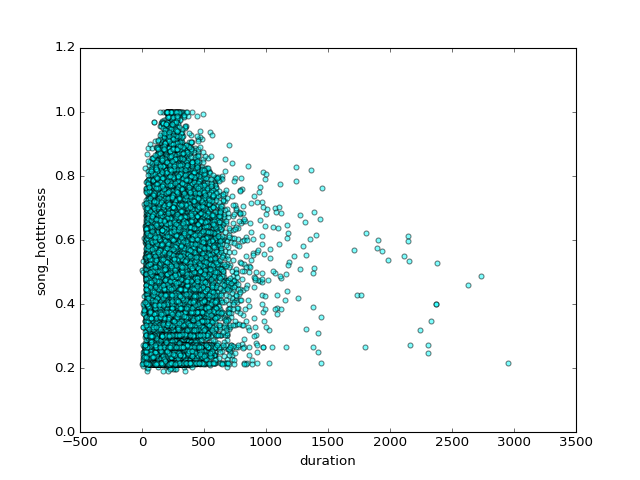

end_of_fade_in


<IPython.core.display.Javascript object>


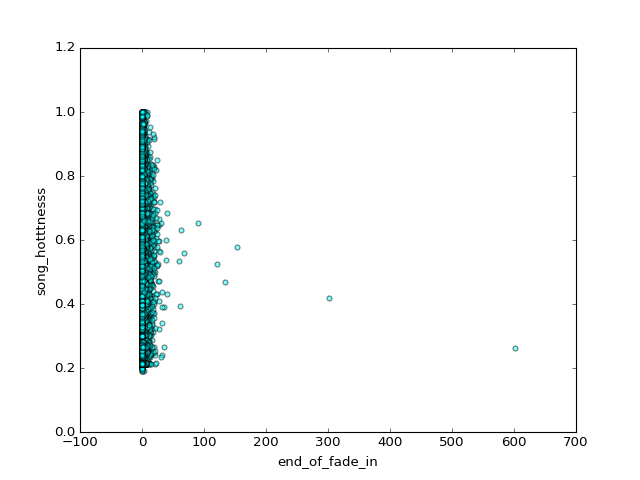

key


<IPython.core.display.Javascript object>


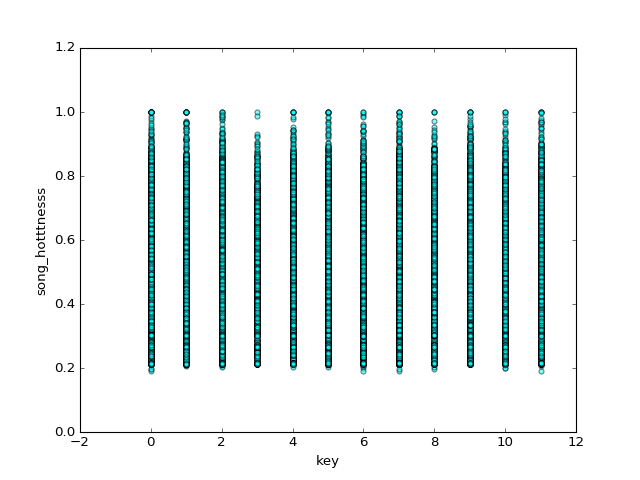

key_confidence


<IPython.core.display.Javascript object>


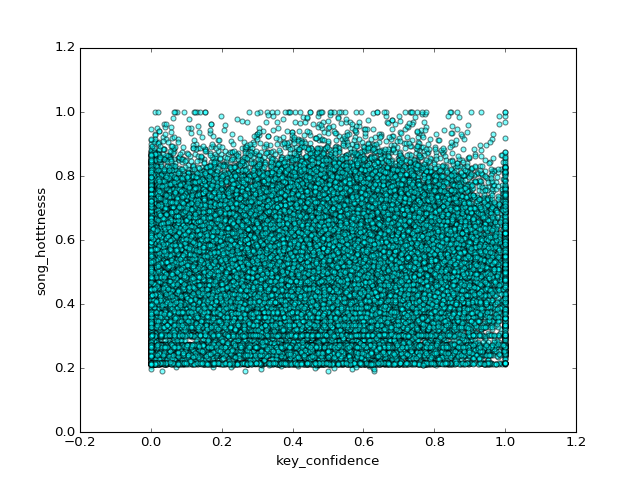

loudness


<IPython.core.display.Javascript object>


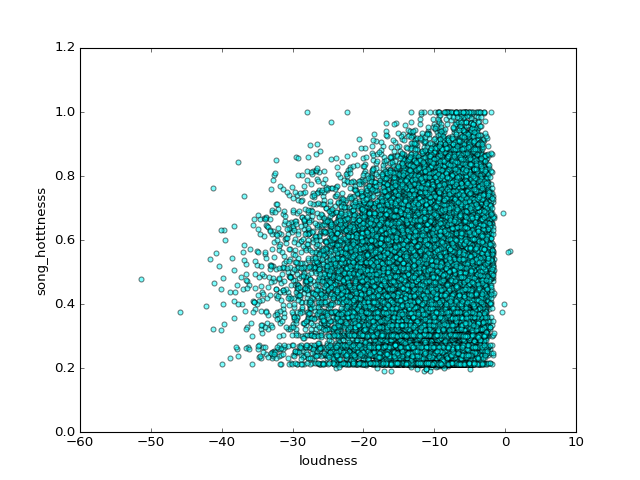

mode


<IPython.core.display.Javascript object>


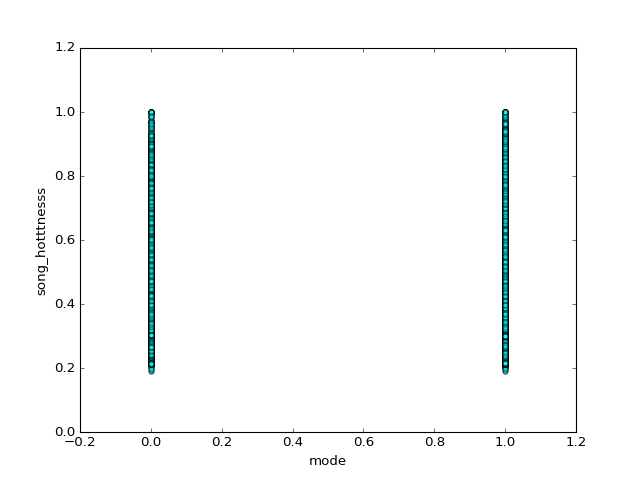

mode_confidence


<IPython.core.display.Javascript object>


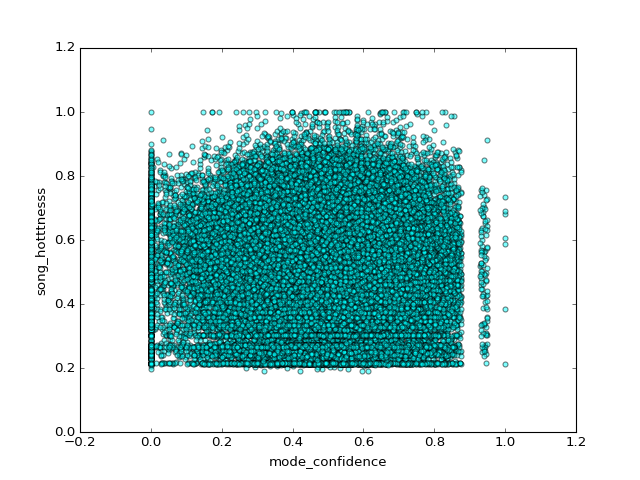

start_of_fade_out


<IPython.core.display.Javascript object>


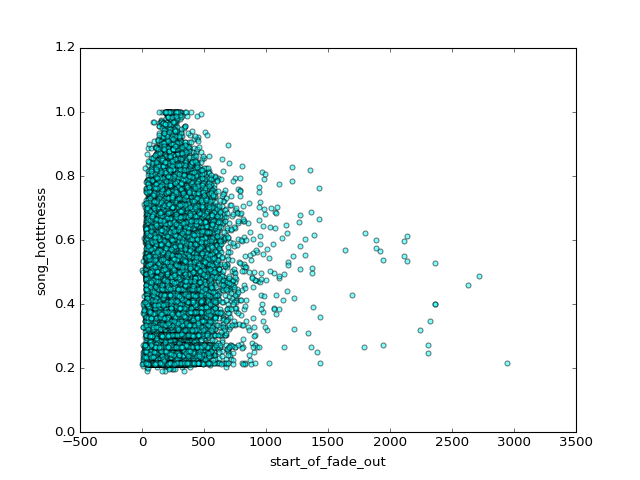

tempo


<IPython.core.display.Javascript object>


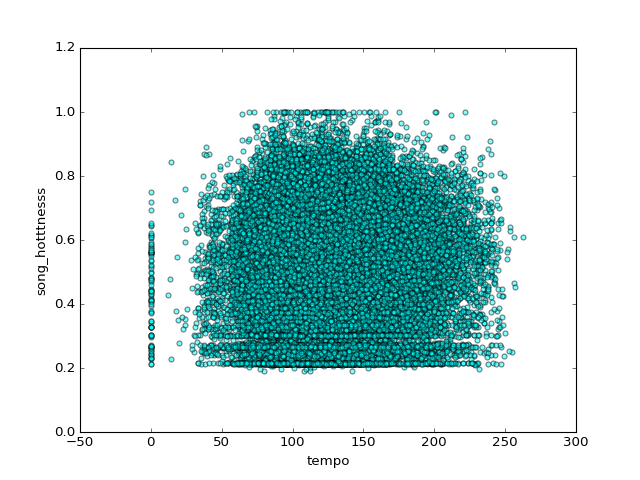

time_signature


<IPython.core.display.Javascript object>


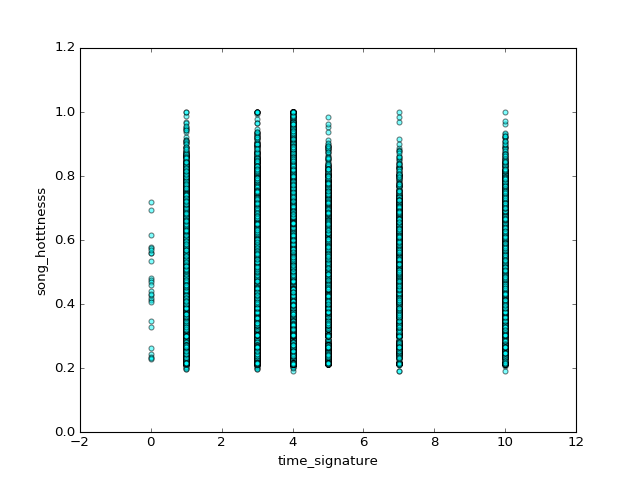

time_signature_confidence


<IPython.core.display.Javascript object>


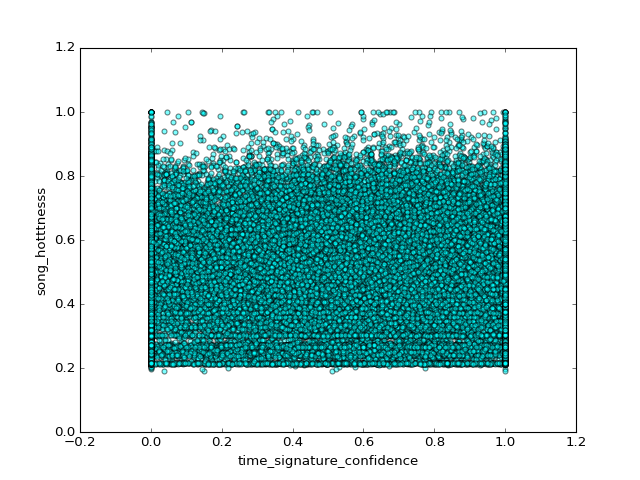

song_hotttnesss


<IPython.core.display.Javascript object>


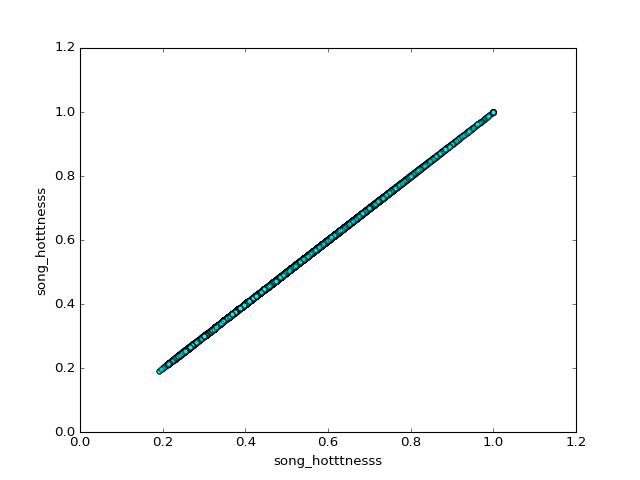

artist_familiarity


<IPython.core.display.Javascript object>


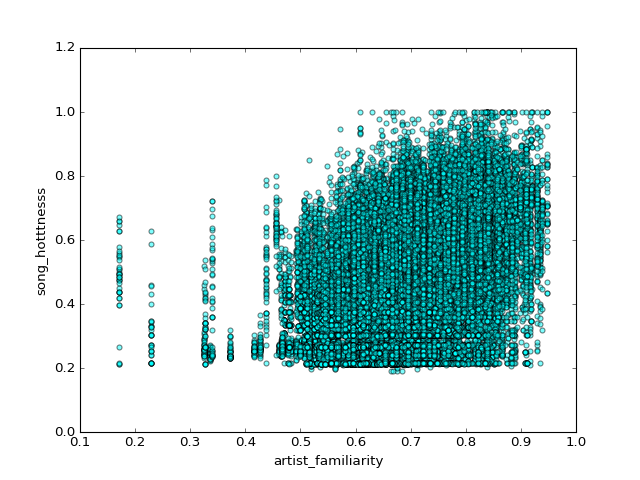

artist_hotttnesss


<IPython.core.display.Javascript object>


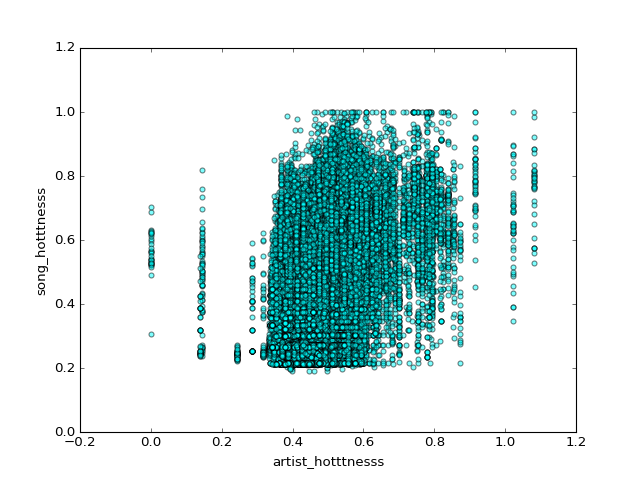

In [43]:
for i in df_clean.columns.values:
    print(i)
    plt.figure()
    plt.scatter(df_clean[i], df_clean['song_hotttnesss'], c='#00ffff' , alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('song_hotttnesss')
    plt.show()
    if(i=='artist_familiarity'):
        plt.savefig('artist_familiarity')

<IPython.core.display.Javascript object>


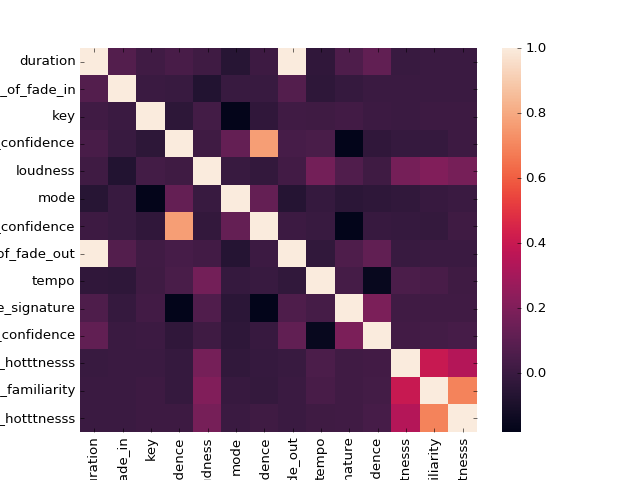

In [33]:
#correlation plot between features
import seaborn as sns
plt.figure()
corr = df_clean.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

## Training - Regression approach 

In [34]:
X_features = df_clean.drop(['song_hotttnesss'], axis=1)
y_target = df_clean['song_hotttnesss']
X_features.shape, y_target.shape

((55395, 13), (55395,))

In [35]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, random_state=42)
X_features.shape, y_target.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55395, 13), (55395,), (41546, 13), (13849, 13), (41546,), (13849,))

### Linear regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linreg = LinearRegression().fit(X_train, y_train)
print('coeff (w): {}'.format(linreg.coef_))
print('intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
print()
y_pred=linreg.predict(X_test)
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

coeff (w): [ 2.69850388e-04  3.25150420e-04 -3.48847247e-04 -6.58422416e-03
  2.82809912e-03 -8.06560810e-03  1.34716675e-03 -2.87061282e-04
  1.28417301e-04  1.77497215e-04  5.53632839e-03  4.81484233e-01
  2.31497110e-01]
intercept (b): 0.080
R-squared score (training): 0.177
R-squared score (test): 0.175

Mean absolute error: 0.12238628770443051


### K nearest neighbor regression

In [37]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 100).fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(knnreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(knnreg.score(X_test, y_test)))
print()
y_pred = knnreg.predict(X_test)
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R-squared score (training): 0.035
R-squared score (test): 0.015

Mean absolute error: 0.1354975876947498


### Random forest regression

In [38]:
#random forest
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=0, n_estimators=100)
rfreg = reg.fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(rfreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(rfreg.score(X_test, y_test)))
print()
y_pred=rfreg.predict(X_test)
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R-squared score (training): 0.913
R-squared score (test): 0.382

Mean absolute error: 0.10156220269702984


As random forest regressor have lots of parameters, so the parameters are tuned using GridSearchCV, which optimizes the estimator by cross-validated grid-search over a parameter grid to find the best parameters.

In [39]:
#Note: parameter tuning takes much time to train
from sklearn.model_selection import GridSearchCV

RF_model = RandomForestRegressor(random_state=0)
grid_values = {'max_depth': [5,15,25,35],'n_estimators':[80,100,120]}
grid_acc = GridSearchCV(RF_model, param_grid = grid_values, cv=5)
grid_acc.fit(X_train, y_train)
#best parameters from above grid_values
print(grid_acc.best_params_)

{'n_estimators': 120, 'max_depth': 35}


In [58]:
print(grid_acc.best_score_)
print('R-squared score (training): {:.3f}'.format(grid_acc.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(grid_acc.score(X_test, y_test)))
y_pred=grid_acc.predict(X_test)
print()
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

0.36153293569763806
R-squared score (training): 0.913
R-squared score (test): 0.384

Mean absolute error: 0.10143629828981879


### Gradient Boosting Regression

In [43]:
#Gradient Boosting regression
from sklearn.ensemble import GradientBoostingRegressor

GBreg=GradientBoostingRegressor(n_estimators=200, max_depth=10, learning_rate=.1,random_state=0).fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(GBreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(GBreg.score(X_test, y_test)))
print()
y_pred=GBreg.predict(X_test)
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R-squared score (training): 0.808
R-squared score (test): 0.375

Mean absolute error: 0.10223120985040561


descending order of importance of features: ['artist_familiarity', 'artist_hotttnesss', 'loudness', 'tempo', 'mode_confidence', 'end_of_fade_in', 'key_confidence', 'start_of_fade_out', 'duration', 'time_signature_confidence', 'key', 'time_signature', 'mode']


<IPython.core.display.Javascript object>


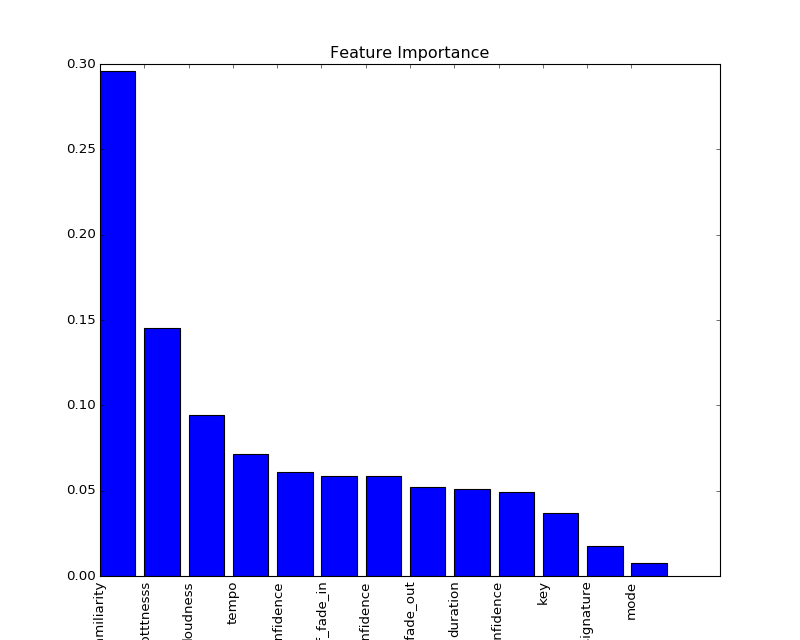

In [48]:
#Feature importance
model = RandomForestRegressor(random_state=0, n_estimators=100).fit(X_features, y_target)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
names = [X_features.columns[i] for i in indices]
print('descending order of importance of features:',names)
#plotting importance of each feature used
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(X_features.shape[1]), importances[indices])
plt.xticks(range(X_features.shape[1]), names, rotation=90)
plt.show()

## Training - Classification approach

In [59]:
#Data preprocessing for classification approach(removing inaccuracies in data)
df1=df_merge[(df_merge['duration']!='y') & (df_merge['key_confidence']!='z')]
print(df1.shape)
df1['key_confidence']= df1['key_confidence'].astype('float64')
df1['duration']= df1['duration'].astype('float64')
df1=df1[~(np.isnan(df1['duration']) | np.isnan(df1['key_confidence']))]
df1.reset_index(inplace=True)
print(df1.shape)
df1.head()

(55474, 22)
(55395, 23)


C:\Users\chira\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chira\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,index,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,...,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence,song_hotttnesss,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude
0,0,SONG_510448,ARTIST_2029,Pressure (Explicit LP Version),2001,22050,202.39628,0.200,0,0.873,...,193.544,111.195,a6220f6edb54938cd4f1a44f7ff48459,4,1.000,0.681186,0.863397,0.551769,42.10125,-72.58929
1,1,SONG_60118,ARTIST_2029,Sober (Live at Hiro Ballroom) (Explicit Version),1,22050,378.90567,0.235,1,0.926,...,367.763,126.644,4211acc477885f6ee15a02a491d538c4,4,0.848,0.513517,0.863397,0.551769,42.10125,-72.58929
2,2,SONG_525679,ARTIST_2029,Pardon Me (Album Version),2008,22050,302.75873,0.148,3,0.654,...,287.660,115.525,a8296a53c26537169e8b743d7179ec54,3,1.000,0.729826,0.863397,0.551769,42.10125,-72.58929
3,3,SONG_518250,ARTIST_2029,Change (Explicit LP Version),2001,22050,214.93506,0.000,11,0.935,...,210.013,122.162,20e70022d53106b3a8e98a2cc05ae510,4,0.959,0.676970,0.863397,0.551769,42.10125,-72.58929
4,4,SONG_293186,ARTIST_2029,Take This (Album Version),2005,22050,282.46159,8.777,1,0.912,...,267.111,115.048,176180470c922a9625c9e92770f35167,3,1.000,0.661648,0.863397,0.551769,42.10125,-72.58929


In [60]:
#classes = No. of equal divisions of data 
#So No. of labels will be classes+1 
classes=10
r=1.0/classes
df1['class']=-1

# Algorithm to define new column class according to range defined
for i in range(classes+1):
    s=0.0
    e=0.0
    if(i==0):
        s=0.0
        e=i/classes+r/2
    elif(i==classes):
        s=i/classes-r/2
        e=1.0
    else:
        s=i/classes-r/2
        e=i/classes+r/2
    df1['class'][(df1['song_hotttnesss']>s) & (df1['song_hotttnesss']<=e)]=i  
    #print(s,e,i)
print(r/2) 
df1.head()

C:\Users\chira\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.05


,index,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,...,tempo,audio_md5,time_signature,time_signature_confidence,song_hotttnesss,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,class
0,0,SONG_510448,ARTIST_2029,Pressure (Explicit LP Version),2001,22050,202.39628,0.200,0,0.873,...,111.195,a6220f6edb54938cd4f1a44f7ff48459,4,1.000,0.681186,0.863397,0.551769,42.10125,-72.58929,7
1,1,SONG_60118,ARTIST_2029,Sober (Live at Hiro Ballroom) (Explicit Version),1,22050,378.90567,0.235,1,0.926,...,126.644,4211acc477885f6ee15a02a491d538c4,4,0.848,0.513517,0.863397,0.551769,42.10125,-72.58929,5
2,2,SONG_525679,ARTIST_2029,Pardon Me (Album Version),2008,22050,302.75873,0.148,3,0.654,...,115.525,a8296a53c26537169e8b743d7179ec54,3,1.000,0.729826,0.863397,0.551769,42.10125,-72.58929,7
3,3,SONG_518250,ARTIST_2029,Change (Explicit LP Version),2001,22050,214.93506,0.000,11,0.935,...,122.162,20e70022d53106b3a8e98a2cc05ae510,4,0.959,0.676970,0.863397,0.551769,42.10125,-72.58929,7
4,4,SONG_293186,ARTIST_2029,Take This (Album Version),2005,22050,282.46159,8.777,1,0.912,...,115.048,176180470c922a9625c9e92770f35167,3,1.000,0.661648,0.863397,0.551769,42.10125,-72.58929,7


In [61]:
df1['key']= df1['key'].astype('float64')
df1['mode']= df1['mode'].astype('float64')
df1['time_signature']= df1['time_signature'].astype('float64')
df1.dtypes

index                          int64
song_id                       object
artist_id                     object
title                         object
year                           int64
analysis_sample_rate           int64
duration                     float64
end_of_fade_in               float64
key                          float64
key_confidence               float64
loudness                     float64
mode                         float64
mode_confidence              float64
start_of_fade_out            float64
tempo                        float64
audio_md5                     object
time_signature               float64
time_signature_confidence    float64
song_hotttnesss              float64
artist_familiarity           float64
artist_hotttnesss            float64
artist_latitude              float64
artist_longitude             float64
class                          int64
dtype: object

In [66]:
label = df1['class']
song_hotness=df1['song_hotttnesss']
label.shape

(55395,)

In [63]:
features=df1.drop(df1.columns[[0,1,2,3,4,5,15,18,21,22,23]], axis=1)
print(features.shape, label.shape)
print(features.dtypes)
features.head()

(55395, 13) (55395,)
duration                     float64
end_of_fade_in               float64
key                          float64
key_confidence               float64
loudness                     float64
mode                         float64
mode_confidence              float64
start_of_fade_out            float64
tempo                        float64
time_signature               float64
time_signature_confidence    float64
artist_familiarity           float64
artist_hotttnesss            float64
dtype: object


,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss
0,202.39628,0.200,0.0,0.873,-3.609,1.0,1.000,193.544,111.195,4.0,1.000,0.863397,0.551769
1,378.90567,0.235,1.0,0.926,-8.563,1.0,0.851,367.763,126.644,4.0,0.848,0.863397,0.551769
2,302.75873,0.148,3.0,0.654,-5.844,0.0,0.807,287.660,115.525,3.0,1.000,0.863397,0.551769
3,214.93506,0.000,11.0,0.935,-5.438,1.0,0.794,210.013,122.162,4.0,0.959,0.863397,0.551769
4,282.46159,8.777,1.0,0.912,-6.900,1.0,0.781,267.111,115.048,3.0,1.000,0.863397,0.551769


In [67]:
features.describe(include='all')

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss
count,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000,55395.000000
mean,245.833019,0.897805,5.245690,0.447570,-9.738562,0.673653,0.477733,236.508788,124.730504,3.962776,0.508130,0.700714,0.491966
std,111.221080,3.679206,3.577555,0.271902,5.036799,0.468880,0.186105,109.129514,35.375675,1.865583,0.367623,0.098566,0.091690
min,0.809340,0.000000,0.000000,0.000000,-51.416000,0.000000,0.000000,0.809000,0.000000,0.000000,0.000000,0.171667,0.000000
25%,185.913020,0.000000,2.000000,0.229000,-12.204500,0.000000,0.365000,177.656000,98.068500,4.000000,0.127000,0.632718,0.431376
50%,233.429750,0.200000,5.000000,0.468000,-8.580000,1.000000,0.491000,223.875000,121.089000,4.000000,0.543000,0.696001,0.482100
75%,286.523630,0.438000,9.000000,0.654000,-6.124000,1.000000,0.609000,275.844500,146.397500,4.000000,0.850000,0.771686,0.539207
max,2950.477910,602.175000,11.000000,1.000000,0.744000,1.000000,1.000000,2943.808000,262.412000,10.000000,1.000000,0.947328,1.082503


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, mean_absolute_error, roc_auc_score, classification_report

In [69]:
#feature scaling (standardized scaling)
X_scaled = preprocessing.scale(features)
X_scaled

array([[-0.39054765, -0.18966349, -1.46629129, ...,  1.33798391,
         1.65050509,  0.65222648],
       [ 1.19648049, -0.18015048, -1.18676824, ...,  0.92451345,
         1.65050509,  0.65222648],
       [ 0.51182946, -0.2037971 , -0.62772214, ...,  1.33798391,
         1.65050509,  0.65222648],
       ...,
       [-0.38725939, -0.24402353, -0.34819908, ..., -1.3822165 ,
        -0.68506584,  0.34029901],
       [ 1.36441375,  0.67737917,  0.49037007, ...,  0.34239056,
        -0.68506584,  0.34029901],
       [-0.12561239, -0.24402353, -0.06867603, ...,  0.07581092,
        -0.68506584,  0.34029901]])

In [70]:
#split the dataset into training data and test data
#test data is the class labels defined above
#song_hotness is also splited below to evaluate the predicted values with the song_hotness values instead of class given 
x_train,x_test,y_train,y_test,sh_train,sh_test= train_test_split(X_scaled, label,song_hotness, test_size=0.25, random_state=0)
features.shape, x_train.shape,x_test.shape, label.shape, y_train.shape, y_test.shape, sh_train.shape , sh_test.shape

((55395, 13),
 (41546, 13),
 (13849, 13),
 (55395,),
 (41546,),
 (13849,),
 (41546,),
 (13849,))

### Logistic regression

In [71]:
clf= LogisticRegression(random_state=0,solver='saga', penalty='l1',multi_class='multinomial', max_iter=1000).fit(x_train, y_train)

C:\Users\chira\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [75]:
pred = clf.predict(x_test)
train_accuracy = accuracy_score(clf.predict(x_train), y_train)
test_accuracy = accuracy_score(pred, y_test)
print ("Training accuracy :", train_accuracy*100)
print ("Testing accuracy :", test_accuracy*100)
print()
print('Mean absolute error:', mean_absolute_error(pred/classes, sh_test)) 
print()
print(classification_report(y_test, pred))

Training accuracy : 26.763105954845233
Testing accuracy : 26.687847498014293

Mean absolute error: 0.12694060466113075

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       763
           3       0.32      0.27      0.29      1990
           4       0.19      0.02      0.03      2187
           5       0.26      0.39      0.31      2988
           6       0.26      0.58      0.36      2934
           7       0.29      0.13      0.18      1977
           8       0.25      0.01      0.02       828
           9       0.00      0.00      0.00       146
          10       0.00      0.00      0.00        36

   micro avg       0.27      0.27      0.27     13849
   macro avg       0.17      0.15      0.13     13849
weighted avg       0.24      0.27      0.22     13849



C:\Users\chira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Support vector machine Classifier

In [76]:
#Linear SVC (simple SVC is impractical For large datasets)
svm_clf= LinearSVC(random_state=0, tol=1e-5, max_iter=1000, dual=False).fit(x_train, y_train)

In [78]:
pred = svm_clf.predict(x_test)
train_accuracy = accuracy_score(svm_clf.predict(x_train), y_train)
test_accuracy = accuracy_score(pred, y_test)
print ("Training accuracy :", train_accuracy*100)
print ("Testing accuracy :", test_accuracy*100)
print()
print('Mean absolute error:', mean_absolute_error(pred/classes, sh_test))

Training accuracy : 26.204688778703122
Testing accuracy : 26.059643295544806

Mean absolute error: 0.12744462881753194


### KNeighbors Classifier

In [79]:
#KNN
KNN_clf = KNeighborsClassifier(n_neighbors=50).fit(x_train, y_train)

In [84]:
pred = KNN_clf.predict(x_test)
train_accuracy = accuracy_score(KNN_clf.predict(x_train), y_train)
test_accuracy = accuracy_score(pred, y_test)
print ("Training accuracy :", train_accuracy*100)
print ("Testing accuracy :", test_accuracy*100)
print()
print('Mean absolute error:', mean_absolute_error(pred/classes, sh_test))

Training accuracy : 30.137678717566068
Testing accuracy : 24.182251426095746

Mean absolute error: 0.13448392914549784


### Gaussian Naive Bayes Classifier

In [81]:
NB_clf = GaussianNB().fit(x_train, y_train)

In [85]:
pred = NB_clf.predict(x_test)
train_accuracy = accuracy_score(KNN_clf.predict(x_train), y_train)
test_accuracy = accuracy_score(pred, y_test)
print ("Training accuracy :", train_accuracy*100)
print ("Testing accuracy :", test_accuracy*100)
print()
print('Mean absolute error:', mean_absolute_error(pred/classes, sh_test))

Training accuracy : 30.137678717566068
Testing accuracy : 23.424073940356706

Mean absolute error: 0.1423906023678244


### Random Forest Classifier

In [86]:
#highly dependend upon parameter values
RF_clf = RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train, y_train)

In [88]:
pred = RF_clf.predict(x_test)
train_accuracy = accuracy_score(RF_clf.predict(x_train), y_train)
test_accuracy = accuracy_score(pred, y_test)
print ("Training accuracy :", train_accuracy*100)
print ("Testing accuracy :", test_accuracy*100)
print()
print('Mean absolute error:', mean_absolute_error(pred/classes, sh_test))

Training accuracy : 99.99759302941318
Testing accuracy : 30.25489204996751

Mean absolute error: 0.12183593046299371


In [89]:
from sklearn.model_selection import GridSearchCV

RF_model = RandomForestClassifier(random_state=0)
grid_values = {'max_depth': [10,15,20],'n_estimators':[80,100,120,140]}
grid_acc = GridSearchCV(RF_model, param_grid = grid_values, cv=5)
grid_acc.fit(x_train, y_train)
grid_acc.best_params_

{'max_depth': 20, 'n_estimators': 140}

In [91]:
pred = grid_acc.predict(x_test)
train_accuracy = accuracy_score(grid_acc.predict(x_train), y_train)
test_accuracy = accuracy_score(pred, y_test)
print ("Training accuracy :", train_accuracy*100)
print ("Testing accuracy :", test_accuracy*100)
print()
print('Mean absolute error:', mean_absolute_error(pred/classes, sh_test))

Training accuracy : 99.65339623549801
Testing accuracy : 30.312657953642862

Mean absolute error: 0.12021245323041374


['artist_familiarity', 'artist_hotttnesss', 'loudness', 'tempo', 'mode_confidence', 'key_confidence', 'duration', 'start_of_fade_out', 'end_of_fade_in', 'time_signature_confidence', 'key', 'time_signature', 'mode']


<IPython.core.display.Javascript object>


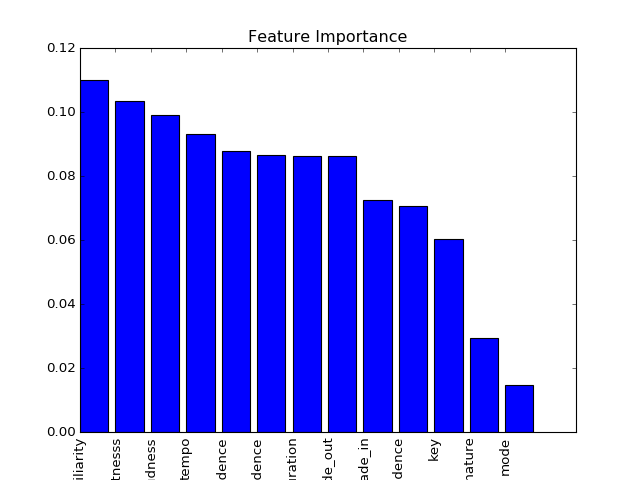

In [94]:
model = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_scaled, label)
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [features.columns[i] for i in indices]
print(names)
# Create plot
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_scaled.shape[1]), importances[indices])
plt.xticks(range(X_scaled.shape[1]), names, rotation=90)
plt.show()

# Prediction

In [51]:
#test data
df_test=pd.read_csv("test.csv")
df_test.reset_index(inplace=True)
print(df_test.shape)
df_test.head()

(27625, 18)


,index,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence
0,0,SONG_365464,ARTIST_12557,Crying Eyes,1971,22050,193.38404,0.246,6,0.000,-19.962,1,0.000,180.135,117.370,d03823618266bb14421c5e0ce7c2dd80,4,0.665
1,1,SONG_451710,ARTIST_2939,Fuck and Run,1993,22050,187.34975,0.142,7,0.579,-8.862,1,0.611,183.049,136.153,7aec017d0194b627d3df0048a2548c6b,4,0.112
2,2,SONG_202731,ARTIST_5718,Highest Star,2009,22050,284.26404,0.000,2,0.306,-4.562,0,0.347,277.269,145.045,2260caf798801300dd08d95fa3bbacda,3,0.745
3,3,SONG_264595,ARTIST_11921,A Rush Of Blood To The Head (Live In Sydney),2003,22050,410.82730,0.000,5,0.463,-8.229,1,0.553,408.079,138.038,4c7564d1d8df7dd6ae4fd9c323a8e08d,4,0.590
4,4,SONG_119114,ARTIST_21432,Mormons/Gay Marriage/Chimp Prostitution,2010,22050,133.48526,0.000,7,0.457,-6.168,1,0.361,133.485,133.817,7110d232a4438695cb4e058d17975c62,4,0.594


In [52]:
#merging artist features to given test data on the basis of common column artist_id
df_testmerge= pd.merge(df_test, df_artist, on='artist_id')
df_testmerge.sort_values(by=['index'],inplace=True)
print(df_testmerge.shape)
df_testmerge.head()

(27625, 22)


,index,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,...,mode_confidence,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude
0,0,SONG_365464,ARTIST_12557,Crying Eyes,1971,22050,193.38404,0.246,6,0.000,...,0.000,180.135,117.370,d03823618266bb14421c5e0ce7c2dd80,4,0.665,0.675771,0.435469,35.47200,-97.52033
26,1,SONG_451710,ARTIST_2939,Fuck and Run,1993,22050,187.34975,0.142,7,0.579,...,0.611,183.049,136.153,7aec017d0194b627d3df0048a2548c6b,4,0.112,0.739769,0.587336,0.00000,0.00000
48,2,SONG_202731,ARTIST_5718,Highest Star,2009,22050,284.26404,0.000,2,0.306,...,0.347,277.269,145.045,2260caf798801300dd08d95fa3bbacda,3,0.745,0.709011,0.553566,0.00000,0.00000
75,3,SONG_264595,ARTIST_11921,A Rush Of Blood To The Head (Live In Sydney),2003,22050,410.82730,0.000,5,0.463,...,0.553,408.079,138.038,4c7564d1d8df7dd6ae4fd9c323a8e08d,4,0.590,0.865022,0.916053,0.00000,0.00000
100,4,SONG_119114,ARTIST_21432,Mormons/Gay Marriage/Chimp Prostitution,2010,22050,133.48526,0.000,7,0.457,...,0.361,133.485,133.817,7110d232a4438695cb4e058d17975c62,4,0.594,0.510993,0.379223,40.73197,-74.17418


In [53]:
#converting datatype
df_testmerge['key']= df_testmerge['key'].astype('float64')
df_testmerge['mode']= df_testmerge['mode'].astype('float64')
df_testmerge['time_signature']= df_testmerge['time_signature'].astype('float64')
df_testmerge.dtypes

index                          int64
song_id                       object
artist_id                     object
title                         object
year                           int64
analysis_sample_rate           int64
duration                     float64
end_of_fade_in               float64
key                          float64
key_confidence               float64
loudness                     float64
mode                         float64
mode_confidence              float64
start_of_fade_out            float64
tempo                        float64
audio_md5                     object
time_signature               float64
time_signature_confidence    float64
artist_familiarity           float64
artist_hotttnesss            float64
artist_latitude              float64
artist_longitude             float64
dtype: object

In [54]:
#removing columns which is not used in training
features_test=df_testmerge.drop(df_testmerge.columns[[0,1,2,3,4,5,15,20,21]], axis=1)
print(features_test.shape)
print(features_test.dtypes)
features_test.head()

(27625, 13)
duration                     float64
end_of_fade_in               float64
key                          float64
key_confidence               float64
loudness                     float64
mode                         float64
mode_confidence              float64
start_of_fade_out            float64
tempo                        float64
time_signature               float64
time_signature_confidence    float64
artist_familiarity           float64
artist_hotttnesss            float64
dtype: object


,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss
0,193.38404,0.246,6.0,0.000,-19.962,1.0,0.000,180.135,117.370,4.0,0.665,0.675771,0.435469
26,187.34975,0.142,7.0,0.579,-8.862,1.0,0.611,183.049,136.153,4.0,0.112,0.739769,0.587336
48,284.26404,0.000,2.0,0.306,-4.562,0.0,0.347,277.269,145.045,3.0,0.745,0.709011,0.553566
75,410.82730,0.000,5.0,0.463,-8.229,1.0,0.553,408.079,138.038,4.0,0.590,0.865022,0.916053
100,133.48526,0.000,7.0,0.457,-6.168,1.0,0.361,133.485,133.817,4.0,0.594,0.510993,0.379223


In [49]:
#best regression model (based on lowest mean_absolute_error in above models) trained on whole training data
best_model = RandomForestRegressor(random_state=0, n_estimators=120, max_depth=35).fit(X_features, y_target)

#### code below will generate the Final submission output csv file

In [57]:
# will generate the Final submission output csv file that i submitted on task website.
y_submit=best_model.predict(features_test)
df_submit=df_test[['song_id']]
df_submit['song_hotttnesss']=y_submit
print(df_submit.shape)
df_submit.to_csv('chirag_result_submit.csv', index=False)
df_submit

(27625, 2)


C:\Users\chira\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,song_id,song_hotttnesss
0,SONG_365464,0.482465
1,SONG_451710,0.579985
2,SONG_202731,0.578586
3,SONG_264595,0.743792
4,SONG_119114,0.374740
5,SONG_37707,0.474687
6,SONG_568613,0.470427
7,SONG_202041,0.372740
8,SONG_182716,0.620957
9,SONG_29040,0.367098
